<a href="https://colab.research.google.com/github/khacphuong2503/Machine-Learning/blob/main/%C4%90%E1%BB%93_%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
DataFile=pd.read_csv("/content/drive/MyDrive/DS102/UIT-ViNames/UIT-ViNames - Train.csv")

In [3]:
print(DataFile)
print('Giới tính nam',DataFile[DataFile.Gender==1].size)
print('Giới tính nữ',DataFile[DataFile.Gender==0].size)
print('Điểm dữ liệu',len(DataFile))

                    Full_Names  Gender
0                Ngô Xuân Tùng       1
1            Bùi Dương Thảo Vy       0
2                  Lưu Thế Huy       1
3               Nguyễn Thị Vân       0
4              Dương Minh Long       1
...                        ...     ...
18790     Trần Nguyễn Tường Vy       0
18791              Phan Hải Âu       1
18792  Phạm Trương Trúc Phương       0
18793         Nguyễn Diệu Hiền       0
18794     Nguyễn Đoàn Thảo Nhi       0

[18795 rows x 2 columns]
Giới tính nam 21648
Giới tính nữ 15942
Điểm dữ liệu 18795


In [4]:
DataFile.describe()

,Gender
count,18795.000000
mean,0.575898
std,0.494219
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
File_Train=pd.read_csv("/content/drive/MyDrive/DS102/UIT-ViNames/UIT-ViNames - Train.csv")
File_Test=pd.read_csv("/content/drive/MyDrive/DS102/UIT-ViNames/UIT-ViNames-Test.csv")

# Phân chia dữ liệu

In [6]:
def Split_File(file):
  i =0
  file["First_Name"]=file["Mid_Name"]=file["Last_Name"]=file.Full_Names
  for FULL_NAME in file.Full_Names:
    Name=FULL_NAME
    Name_Split= Name.split()
    file.First_Name[i]=Name_Split[0]
    file.Mid_Name[i]=str(Name_Split[1:-1])
    file.Last_Name[i]=Name_Split[-1]
    i=i+1


In [7]:
Split_File(File_Train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [8]:
File_Train

,Full_Names,Gender,First_Name,Mid_Name,Last_Name
0,Ngô Xuân Tùng,1,Ngô,['Xuân'],Tùng
1,Bùi Dương Thảo Vy,0,Bùi,"['Dương', 'Thảo']",Vy
2,Lưu Thế Huy,1,Lưu,['Thế'],Huy
3,Nguyễn Thị Vân,0,Nguyễn,['Thị'],Vân
4,Dương Minh Long,1,Dương,['Minh'],Long
...,...,...,...,...,...
18790,Trần Nguyễn Tường Vy,0,Trần,"['Nguyễn', 'Tường']",Vy
18791,Phan Hải Âu,1,Phan,['Hải'],Âu
18792,Phạm Trương Trúc Phương,0,Phạm,"['Trương', 'Trúc']",Phương
18793,Nguyễn Diệu Hiền,0,Nguyễn,['Diệu'],Hiền


#Mô hình NB

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [10]:
cv = CountVectorizer()
X_train = cv.fit_transform(File_Train.Full_Names)
y_train = File_Train.Gender
X_test = cv.transform(File_Test.Full_Names)
y_test = File_Test.Gender

In [11]:
# hiển thị một số thông tin về dữ liệu 
print("Dữ liệu training = ", X_train.shape, y_train.shape)
print("Dữ liệu testing = ", X_test.shape, y_test.shape)

Dữ liệu training =  (18795, 1292) (18795,)
Dữ liệu testing =  (5370, 1292) (5370,)


In [12]:
print("- Training ...")
clf = MultinomialNB()
clf.fit(X_train,y_train)
print("- model - train complete")

- Training ...
- model - train complete


In [13]:
print("- Test ...")
clf.score(X_test,y_test)
Pre_clf=clf.predict(X_test)

- Test ...


In [14]:
File_Test[:15]

,Full_Names,Gender
0,Nguyễn Văn Tiến,1
1,Vũ Minh Nhật,1
2,Nguyễn Ngọc Thành,1
3,Lê Văn Tuấn,1
4,Nguyễn Duy Khánh,1
5,Trần Hiếu,0
6,Nguyễn Thị Thu Huyền,0
7,Trương Thanh Sơn,1
8,Lê Văn Bảo,1
9,Thủy Ngọc Hà,1


In [15]:
Pre_clf[:15]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [16]:
import csv
writer = csv.writer(open("/content/drive/MyDrive/DS102/out_true.csv", 'w'))
writer.writerow(["Full_Names","Gender_Predicted","Gender_True"])
i=0
for x in Pre_clf[:15]:
  if (x == File_Test.Gender[i]):
    writer.writerow([File_Test.Full_Names[i],x,File_Test.Gender[i]])
    #arr_true.append([File_Test.Full_Names[i],x,File_Test.Gender[i]])
  i+=1

In [17]:
def Out_CSV(Module,File_CSV): # mô hình,file csv cần xuất: Hàm xuất đúng  chỉ cần đổi tên file trong đg dẫn và phép so sánh => file CSV sai
  writer = csv.writer(open("/content/drive/MyDrive/DS102/out_3.csv", 'w'))
  writer.writerow(["Full_Names","Gender_Predicted","Gender_True"])
  i=0
  for x in Module:
    if (x != File_CSV.Gender[i]):
      writer.writerow([File_CSV.Full_Names[i],x,File_CSV.Gender[i]])
      #arr_true.append([File_Test.Attr[i],x,File_CSV.Gender[i]])
    i+=1

In [18]:
Out_CSV(Pre_clf,File_Test)

In [19]:
arr_true

NameError: ignored

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy: " + str(accuracy_score(y_test, Pre_clf)))
print("Precision: " + str(precision_score(y_test, Pre_clf)))
print("Recall: " + str(recall_score(y_test, Pre_clf)))
print("F1-micro: " + str(f1_score(y_test, Pre_clf)))
print("F1-macro: " + str(f1_score(y_test, Pre_clf, average='macro')))
cf = confusion_matrix(y_test, Pre_clf)


Accuracy: 0.9493482309124768
Precision: 0.9558584875040571
Recall: 0.9558584875040571
F1-micro: 0.9558584875040571
F1-macro: 0.948221947989687


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Pre_clf)) 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2289
           1       0.96      0.96      0.96      3081

    accuracy                           0.95      5370
   macro avg       0.95      0.95      0.95      5370
weighted avg       0.95      0.95      0.95      5370



In [22]:
from sklearn.metrics import confusion_matrix

matrix_clf = confusion_matrix(y_test, Pre_clf)

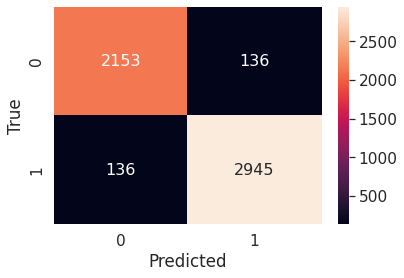

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1.4) 
sn.heatmap(matrix_clf, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
def gender_trans_clf(name):
    Name = [name]
    vector = cv.transform(Name).toarray()
    if clf.predict(vector) == 1:
        print("Giới Tính: Nam")
    else:
        print("Giới Tính: Nữ")

In [25]:
gender_trans_clf("Ngọc Anh")

Giới Tính: Nữ


# Mô hình SVM và GridSearchCV


In [26]:
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [27]:
X_train_SVM = cv.fit_transform(File_Train.Full_Names)
y_train_SVM = File_Train.Gender
X_test_SVM = cv.transform(File_Test.Full_Names)
y_test_SVM = File_Test.Gender

In [28]:
# hiển thị một số thông tin về dữ liệu 
print("Dữ liệu training = ", X_train_SVM.shape, y_train_SVM.shape)
print("Dữ liệu testing = ", X_test_SVM.shape, y_test_SVM.shape)

Dữ liệu training =  (18795, 1292) (18795,)
Dữ liệu testing =  (5370, 1292) (5370,)


In [29]:
print("- Training ...")
# X_train.shape
print("- Train size = {}".format(X_train_SVM.shape))
model = svm.SVC()
model.fit(X_train_SVM, y_train_SVM)
print("- model - train complete")

- Training ...
- Train size = (18795, 1292)
- model - train complete


In [30]:
y_pred = model.predict(X_test_SVM)
Pre_svm=model.predict(X_test_SVM)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: " + str(accuracy_score(y_test_SVM, Pre_clf)))
print("Precision: " + str(precision_score(y_test_SVM, Pre_clf)))
print("Recall: " + str(recall_score(y_test_SVM, Pre_clf)))
print("F1-micro: " + str(f1_score(y_test_SVM, Pre_clf)))
print("F1-macro: " + str(f1_score(y_test_SVM, Pre_clf, average='macro')))
cf = confusion_matrix(y_test_SVM, Pre_clf)

Accuracy: 0.9493482309124768
Precision: 0.9558584875040571
Recall: 0.9558584875040571
F1-micro: 0.9558584875040571
F1-macro: 0.948221947989687


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test_SVM, Pre_svm)) 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2289
           1       0.95      0.97      0.96      3081

    accuracy                           0.95      5370
   macro avg       0.95      0.95      0.95      5370
weighted avg       0.95      0.95      0.95      5370



In [33]:
from sklearn.metrics import confusion_matrix

matrix_svm = confusion_matrix(y_test_SVM, Pre_svm)

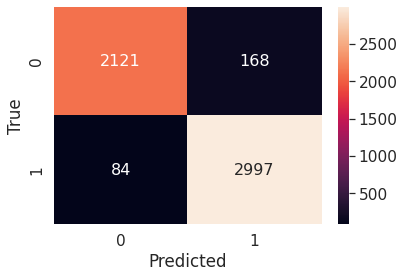

In [34]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1.4) 
sn.heatmap(matrix_svm, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV # link tham khảo:https://cafedev.vn/tu-hoc-ml-dieu-chinh-sieu-tham-so-svm-bang-gridsearchcv-ml/
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_SVM, y_train_SVM) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.943 total time=   2.8s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.943 total time=   3.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.944 total time=   3.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   2.8s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.942 total time=   2.8s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.943 total time=   2.8s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.943 total time=   2.9s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.944 total time=   2.9s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.940 total time=   2.9s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.942 total time=   2.9s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.943 total time=   2.9s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             verbose=3)

In [36]:
predictions = grid.predict(X_test_SVM) 
print(classification_report(y_test_SVM, predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2289
           1       0.95      0.97      0.96      3081

    accuracy                           0.95      5370
   macro avg       0.95      0.95      0.95      5370
weighted avg       0.95      0.95      0.95      5370



In [37]:
print("Thông số tốt nhất:",grid.best_params_) 
print("Công cụ ướng tính tốt nhất:",grid.best_estimator_) 

Thông số tốt nhất: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Công cụ ướng tính tốt nhất: SVC(C=10, gamma=1, kernel='linear')


In [38]:
def gender_trans_svm(name):
    Name = [name]
    vector = cv.transform(Name).toarray()
    if model.predict(vector) == 1:
        print("Giới Tính:Nam")
    else:
        print("Giới Tính:Nữ")

In [ ]:
gender_trans_svm("Nguyễn Ngọc Thủy")

Giới Tính:Nữ


# Mô hình Logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
print(File_Train.columns)

Index(['Full_Names', 'Gender', 'First_Name', 'Mid_Name', 'Last_Name'], dtype='object')


In [40]:
File_Train.sample(5)

,Full_Names,Gender,First_Name,Mid_Name,Last_Name
11514,Nguyễn Thị Lan Hương,0,Nguyễn,"['Thị', 'Lan']",Hương
3297,Hà Minh Thảo,1,Hà,['Minh'],Thảo
1569,Nguyễn Quốc Phúc,1,Nguyễn,['Quốc'],Phúc
12715,Nguyễn Thị Ngọc Ánh,0,Nguyễn,"['Thị', 'Ngọc']",Ánh
8424,Lê Trung Nghĩa,1,Lê,['Trung'],Nghĩa


In [41]:
cv = CountVectorizer()
X_train_lg = cv.fit_transform(File_Train.Full_Names)
y_train_lg = File_Train.Gender
X_test_lg = cv.transform(File_Test.Full_Names)
y_test_lg = File_Test.Gender

In [42]:
print("Dữ liệu training = ", X_train_lg.shape, y_train_lg.shape)
print("Dữ liệu testing = ", X_test_lg.shape, y_test_lg.shape)

Dữ liệu training =  (18795, 1292) (18795,)
Dữ liệu testing =  (5370, 1292) (5370,)


In [43]:
model1 = LogisticRegression()
model1.fit(X_train_lg, y_train_lg)

LogisticRegression()

In [44]:
y_pred1 = model1.predict(X_test_lg)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: " + str(accuracy_score(y_test_lg, y_pred1)))
print("Precision: " + str(precision_score(y_test_lg,y_pred1)))
print("Recall: " + str(recall_score(y_test_lg, y_pred1)))
print("F1-micro: " + str(f1_score(y_test_lg, y_pred1)))
print("F1-macro: " + str(f1_score(y_test_lg, y_pred1, average='macro')))
cf = confusion_matrix(y_test_lg, y_pred1)

Accuracy: 0.9547486033519553
Precision: 0.9504761904761905
Recall: 0.9717624148003895
F1-micro: 0.9610014443909485
F1-macro: 0.9535546144110431


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test_lg, y_pred1)) 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2289
           1       0.95      0.97      0.96      3081

    accuracy                           0.95      5370
   macro avg       0.96      0.95      0.95      5370
weighted avg       0.95      0.95      0.95      5370



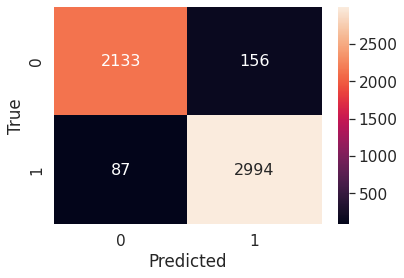

In [47]:
import seaborn as sn
import matplotlib.pyplot as plt
matrix_lg = confusion_matrix(y_test_lg, y_pred1)
sn.set(font_scale=1.4) 
sn.heatmap(matrix_lg, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')  
plt.show()

In [48]:
f1_model1 = f1_score(y_test_lg, y_pred1,average='macro')


In [49]:
def gender_trans_model1(name):
    Name = [name]
    vector = cv.transform(Name).toarray()
    if model1.predict(vector) == 1:
        print("Giới Tính: Nam")
    else:
        print("Giới Tính: Nữ")

In [51]:
gender_trans_model1("Thanh Thảo")

Giới Tính: Nữ


# Mô hình KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [52]:
X_train_KNN = cv.fit_transform(File_Train.Full_Names)
y_train_KNN = File_Train.Gender
X_test_KNN = cv.transform(File_Test.Full_Names)
y_test_KNN = File_Test.Gender

In [53]:
# hiển thị một số thông tin về dữ liệu 
print("Dữ liệu training = ", X_train_KNN.shape, y_train_KNN.shape)
print("Dữ liệu testing = ", X_test_KNN.shape, y_test_KNN.shape)

Dữ liệu training =  (18795, 1292) (18795,)
Dữ liệu testing =  (5370, 1292) (5370,)


In [54]:
KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(X_train_KNN, y_train_KNN)

KNeighborsClassifier(n_neighbors=3)

In [55]:
Pre_KNN= KNN.predict(X_test_KNN)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: " + str(accuracy_score(y_test_KNN, Pre_KNN)))
print("Precision: " + str(precision_score(y_test_KNN, Pre_KNN)))
print("Recall: " + str(recall_score(y_test_KNN, Pre_KNN)))
print("F1-micro: " + str(f1_score(y_test_KNN, Pre_KNN)))
print("F1-macro: " + str(f1_score(y_test_KNN, Pre_KNN, average='macro')))
cf = confusion_matrix(y_test_KNN, Pre_KNN)

Accuracy: 0.9163873370577281
Precision: 0.9004869141813755
Recall: 0.9604024667315807
F1-micro: 0.9294801319302655
F1-macro: 0.9134023115631205


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test_SVM, Pre_svm)) 

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2289
           1       0.95      0.97      0.96      3081

    accuracy                           0.95      5370
   macro avg       0.95      0.95      0.95      5370
weighted avg       0.95      0.95      0.95      5370



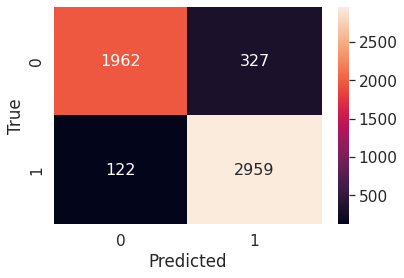

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

matrix_knn = confusion_matrix(y_test_KNN, Pre_KNN)
sn.set(font_scale=1.4) 
sn.heatmap(matrix_knn, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
y_pred = KNN.predict(X_test_KNN)
f1_knn = f1_score(y_test_KNN, y_pred,average='macro')
print(f1_knn)

0.9134023115631205


In [60]:
def gender_trans_knn(name):
    Name = [name]
    vector = cv.transform(Name).toarray()
    if KNN.predict(vector) == 1:
        print("Giới Tính:Nam")
    else:
        print("Giới Tính:Nữ")

In [68]:
gender_trans_knn("Tố Phương")

Giới Tính:Nam


# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
import time 

start_time = time.time()

dtc = DecisionTreeClassifier(random_state=0,max_depth=65)
dtc.fit(X_train_SVM,y_train_SVM)

print("---- Mất {} để huấn luyện mô hình ----".format((time.time() - start_time)))

---- Mất 0.1894214153289795 để huấn luyện mô hình ----


In [64]:
predictions_DT = dtc.predict(X_test_SVM)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_DT , y_test_SVM)*100)

SVM Accuracy Score ->  93.7243947858473
